In [38]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *


plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

#### Experiment #1 : RGB layer

In [39]:
model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

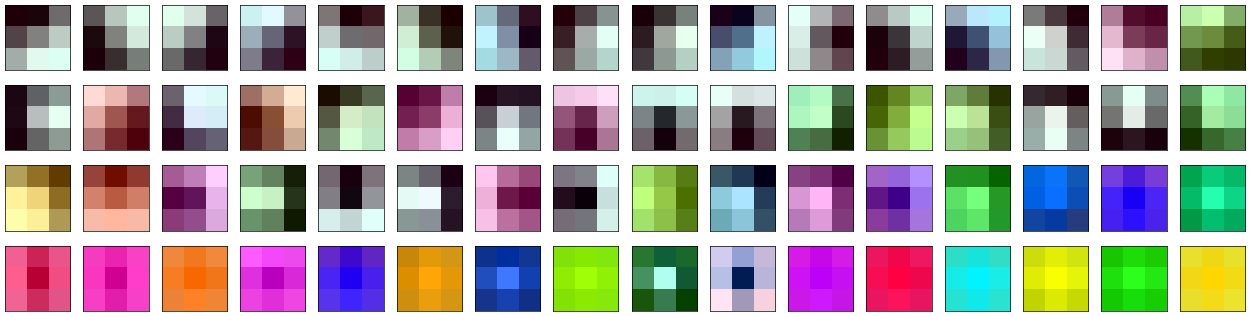

In [45]:

filters = get_filter(model, 0)

FILTER = list(range(filters.shape[-1]))


#fig = plt.figure(figsize=(15, 90))
fig, axes = plt.subplots(ncols = filters.shape[-1]//4, nrows=4, figsize=(16, 4))
axes = axes.flatten()
mags = []

syms = []
antis = [] 
fs = []

filters = get_filter(model, 0)
s, a = getSymAntiSymTF(filters)
theta = getSobelTF(filters)
a_energy = reduce_euclidean_norm(a, axis=[0,1])**2
s_energy = reduce_euclidean_norm(s, axis=[0,1])**2
total_energy  = reduce_euclidean_norm(filters, axis=[0,1])**2
#beta = a_energy/total_energy
beta = tf.reduce_mean(a_energy/total_energy, (0))

for i in range(filters.shape[-1]):
    fs.append((filters[:,:, :,i], beta[i]))

fs = sorted(fs, key=lambda f: f[1], reverse=True)  

#axses = axes.flatten(order='F')[0]
for i , (f, beta) in enumerate(fs):
    #print(beta)

    ax = axes[i]

    #anti_norm  =  (anti - anti.min())/(anti.max() - anti.min()) #pre.MinMaxScaler(copy=False).fit_transform(x).reshape(3,3,3)
    #sym_norm  =  (sym - sym.min())/(sym.max() - sym.min()) #pre.MinMaxScaler(copy=False).fit_transform(x).reshape(3,3,3)
    f_norm  =  (f - f.min())/(f.max() - f.min()) #pre.MinMaxScaler(copy=False).fit_transform(x).reshape(3,3,3)

    #ax.set_title(f" beta={beta:.3f}")
    ax.imshow(f_norm)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax.set_box_aspect(1)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

plt.show()


In [41]:
fig.savefig('figures/vgg16_rgb.pdf', dpi=600, rasterized=True)
plt.show()

c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error in 3.6
  """Entry point for launching an IPython kernel.
